In [24]:
import pandas as pd
import numpy as np
import datetime
from dateutil import parser
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('raw-data/instagram/js-posts-all/jamstone_posts.csv')

In [5]:
df.head()

,Unnamed: 0,index,date,caption,comments,likes
0,0,0,2022-03-26 10:33:06,🧡𝐒𝐮𝐧 𝟐𝟕 𝐌𝐚𝐫 | 𝟕.𝟑𝟎𝐩𝐦 @jam.stones @lavvalsg 𝐒𝐡𝐨...,0,48
1,1,1,2022-03-26 10:02:08,𝐒𝐡𝐨𝐩 𝐚𝐭 𝐨𝐮𝐫 𝐬𝐭𝐮𝐝𝐢𝐨 𝐍𝐨𝐰! :𝐃 @newagegaia \n*Appo...,0,128
2,2,2,2022-03-24 04:05:49,Prepping our first Bridesmaids Mystery Box ord...,15,124
3,3,3,2022-03-19 09:02:38,🧡𝐒𝐮𝐧 𝟐𝟎 𝐌𝐚𝐫 | 𝟕.𝟑𝟎𝐩𝐦 @jam.stones @lavvalsg 𝐒𝐡...,0,117
4,4,4,2022-03-18 09:30:33,"🌙 𝐒𝐞𝐥𝐞𝐧𝐞 (𝐂𝐚𝐥𝐦𝐧𝐞𝐬𝐬, 𝐏𝐞𝐚𝐜𝐞, 𝐁𝐞𝐚𝐮𝐭𝐲 𝐚𝐧𝐝 𝐅𝐞𝐦𝐚𝐥𝐞 𝐖...",0,96


In [12]:
df["Day of Week"] = df["date"].apply(lambda x: parser.parse(x).strftime('%A'))
df["Hour"] = df["date"].apply(lambda x: parser.parse(x).strftime('%H'))

In [13]:
df.head(10)

,Unnamed: 0,index,date,caption,comments,likes,Day,Day of Week,Hour
0,0,0,2022-03-26 10:33:06,🧡𝐒𝐮𝐧 𝟐𝟕 𝐌𝐚𝐫 | 𝟕.𝟑𝟎𝐩𝐦 @jam.stones @lavvalsg 𝐒𝐡𝐨...,0,48,2022-03-26,Saturday,10
1,1,1,2022-03-26 10:02:08,𝐒𝐡𝐨𝐩 𝐚𝐭 𝐨𝐮𝐫 𝐬𝐭𝐮𝐝𝐢𝐨 𝐍𝐨𝐰! :𝐃 @newagegaia \n*Appo...,0,128,2022-03-26,Saturday,10
2,2,2,2022-03-24 04:05:49,Prepping our first Bridesmaids Mystery Box ord...,15,124,2022-03-24,Thursday,04
3,3,3,2022-03-19 09:02:38,🧡𝐒𝐮𝐧 𝟐𝟎 𝐌𝐚𝐫 | 𝟕.𝟑𝟎𝐩𝐦 @jam.stones @lavvalsg 𝐒𝐡...,0,117,2022-03-19,Saturday,09
4,4,4,2022-03-18 09:30:33,"🌙 𝐒𝐞𝐥𝐞𝐧𝐞 (𝐂𝐚𝐥𝐦𝐧𝐞𝐬𝐬, 𝐏𝐞𝐚𝐜𝐞, 𝐁𝐞𝐚𝐮𝐭𝐲 𝐚𝐧𝐝 𝐅𝐞𝐦𝐚𝐥𝐞 𝐖...",0,96,2022-03-18,Friday,09
5,5,5,2022-03-16 13:25:18,"🌈𝐑𝐚𝐢𝐧𝐛𝐨𝐰 ( 𝐂𝐚𝐫𝐞𝐞𝐫, 𝐂𝐨𝐧𝐟𝐢𝐝𝐞𝐧𝐜𝐞, 𝐋𝐨𝐯𝐞, 𝐆𝐫𝐨𝐰𝐭𝐡, 𝐖...",6,111,2022-03-16,Wednesday,13
6,6,6,2022-03-14 08:50:00,🌼𝐉𝐞𝐰𝐞𝐥𝐫𝐲 𝐌𝐲𝐬𝐭𝐞𝐫𝐲 𝐁𝐨𝐱✨\n*$5 off vouchers up for...,0,64,2022-03-14,Monday,08
7,7,7,2022-03-13 04:20:24,🧡𝐒𝐮𝐧 𝟏𝟑 𝐌𝐚𝐫 | 𝟕.𝟑𝟎𝐩𝐦 *𝐓𝐎𝐍𝐈𝐆𝐇𝐓* @jam.stones @la...,0,108,2022-03-13,Sunday,04
8,8,8,2022-03-11 09:11:04,𝐁𝐥𝐮𝐞 𝐒𝐡𝐞𝐞𝐧 𝐌𝐨𝐨𝐧𝐬𝐭𝐨𝐧𝐞\nIt promotes intuition by...,0,76,2022-03-11,Friday,09
9,9,9,2022-03-09 12:51:27,For the Agate lovers !!! 😍😍😍\n* prices before ...,2,73,2022-03-09,Wednesday,12


In [14]:
df_jamstone = df[["comments","likes","Day","Day of Week","Hour"]]

df_jamstone

,comments,likes,Day,Day of Week,Hour
0,0,48,2022-03-26,Saturday,10
1,0,128,2022-03-26,Saturday,10
2,15,124,2022-03-24,Thursday,04
3,0,117,2022-03-19,Saturday,09
4,0,96,2022-03-18,Friday,09
...,...,...,...,...,...
598,0,21,2020-04-12,Sunday,13
599,0,22,2020-04-12,Sunday,13
600,0,22,2020-04-12,Sunday,13
601,0,22,2020-04-12,Sunday,13


In [17]:
df_jamstone = df_jamstone.sort_values(['likes'], ascending=False)

df_jamstone

,comments,likes,Day,Day of Week,Hour
27,81,818,2022-01-01,Saturday,15
157,960,385,2021-07-03,Saturday,04
121,16,370,2021-07-24,Saturday,12
120,33,369,2021-07-24,Saturday,14
164,730,353,2021-06-19,Saturday,13
...,...,...,...,...,...
32,176,-1,2021-12-20,Monday,03
110,4,-1,2021-08-10,Tuesday,06
206,415,-1,2021-05-02,Sunday,04
537,4,-1,2020-07-05,Sunday,05


In [40]:
df_jamstone_no_giveaway = df_jamstone[df_jamstone["comments"] != "giveaway"]

df_jamstone_no_giveaway

,comments,likes,Day,Day of Week,Hour
27,81,818,2022-01-01,Saturday,15
157,960,385,2021-07-03,Saturday,04
121,16,370,2021-07-24,Saturday,12
120,33,369,2021-07-24,Saturday,14
164,730,353,2021-06-19,Saturday,13
...,...,...,...,...,...
32,176,-1,2021-12-20,Monday,03
110,4,-1,2021-08-10,Tuesday,06
206,415,-1,2021-05-02,Sunday,04
537,4,-1,2020-07-05,Sunday,05


In [22]:
df_jamstone_mean = df_jamstone.groupby(['Day of Week','Hour']).mean().sort_values(['likes'], ascending=False)

df_jamstone_mean

comments       likes
Day of Week Hour                        
Monday      04    237.000000  221.000000
Thursday    01      4.000000  208.000000
Tuesday     03     16.000000  197.500000
            00     11.000000  159.000000
Saturday    15     11.625000  156.250000
...                      ...         ...
Wednesday   04      1.000000   38.285714
Friday      17      0.666667   33.555556
Sunday      13      0.444444   31.555556
Friday      15      0.125000   31.000000
            16      0.285714   30.214286

[98 rows x 2 columns]

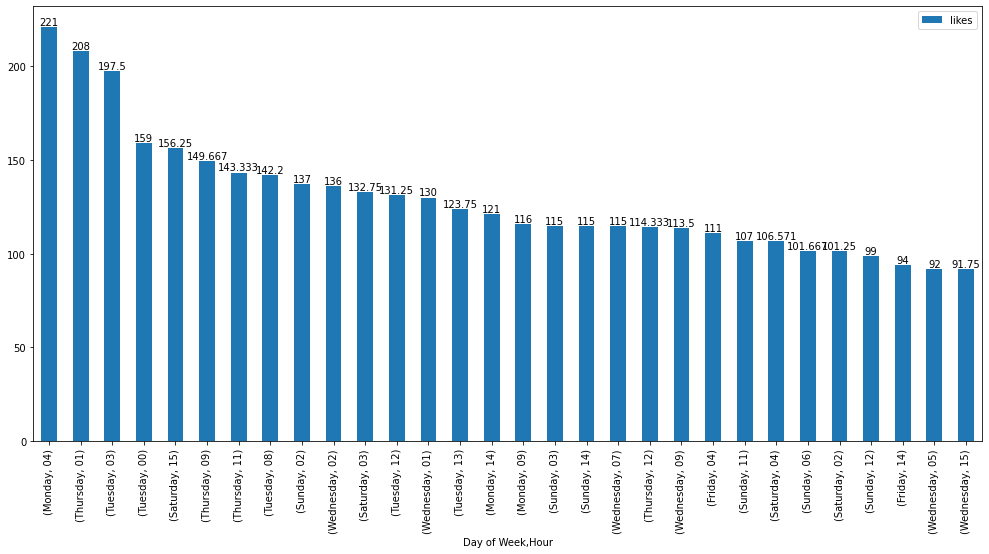

In [35]:
ax_df_jamstone_mean = df_jamstone_mean.head(30).plot.bar(y="likes", figsize=(17,8))

for container in ax_df_jamstone_mean.containers:
    ax_df_jamstone_mean.bar_label(container)

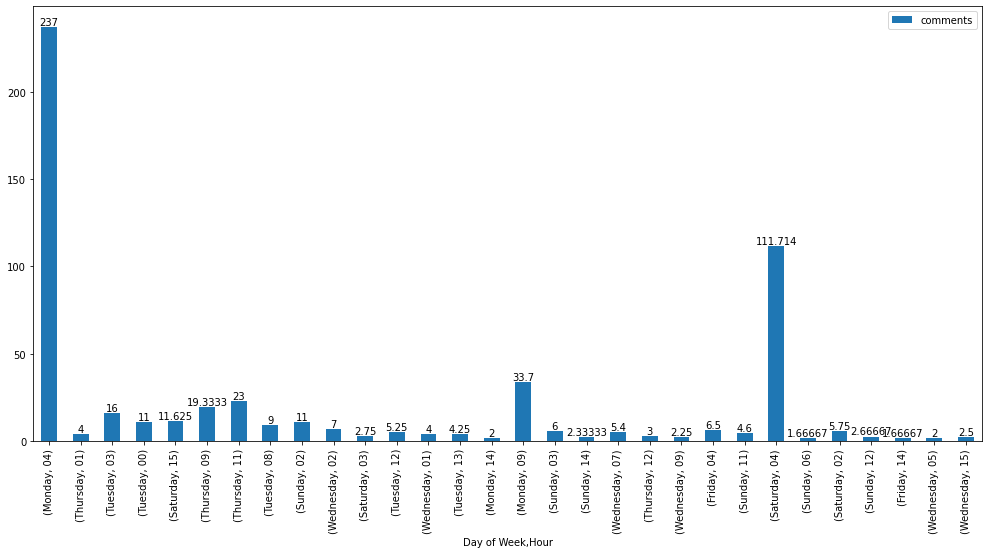

In [36]:
ax_df_jamstone_mean = df_jamstone_mean.head(30).plot.bar(y="comments", figsize=(17,8))

for container in ax_df_jamstone_mean.containers:
    ax_df_jamstone_mean.bar_label(container)

In [37]:
df_jamstone_mean_comments = df_jamstone.groupby(['Day of Week','Hour']).mean().sort_values(['comments'], ascending=False)

df_jamstone_mean_comments

,,comments,likes
Day of Week,Hour,,
Monday,04,237.000000,221.000000
Saturday,04,111.714286,106.571429
Sunday,04,84.400000,52.800000
Friday,09,50.666667,90.000000
Monday,03,44.750000,52.500000
...,...,...,...
Sunday,01,0.000000,74.500000
Saturday,01,0.000000,42.000000
Monday,08,0.000000,74.000000


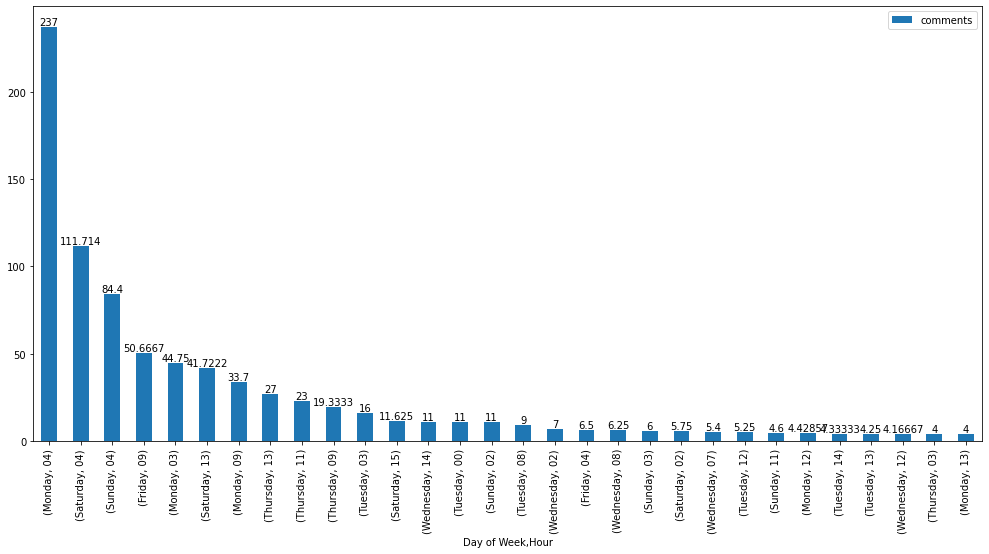

In [38]:
ax_df_jamstone_mean_comments = df_jamstone_mean_comments.head(30).plot.bar(y="comments", figsize=(17,8))

for container in ax_df_jamstone_mean_comments.containers:
    ax_df_jamstone_mean_comments.bar_label(container)